In [1]:
# Applying the IPF for frequncy modulation similar to the Sound Syntheszis of a Violin similar to the approach described in "Linke S, Mores R, Bader R (2022) Describing minimum bow force using impulse pattern formulation (IPF)—n empirical validation. Proc Meetings Acoust 49(1):123"

import numpy as np
import pya

import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile

import IPF_functions as IPF

In [14]:
g0=0.5 # initial value of IPF
p=[0.36,0.1] #IPF modelling Paramters, where g[0] refers to alpha and p[1:] to the different beta_k
al=0.43 #alpha after all iterations

f0=160 #foundamental frequency of the syntesized sound in Hz
dur=2 # approx. duration of the syntesized sound in seconds
mD=2 #modulation Depth


Fs=44100 #sampling rate

lT=np.int32(Fs/f0) # number of samples of a single Periode
it=np.int32(f0*dur) #number of iterations the Ipf is calculateted (equals number of periods of the produced sound)
lS=it*lT #number of sampels of the syntesized sound

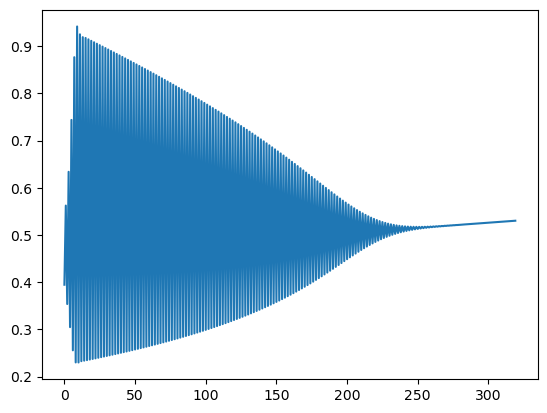

In [15]:
g=IPF.IPF_chAlpha(it,p,al,g0) # calculate time series of system state g
dg=np.append([0],np.diff(g)) # change of system state

plt.plot(g)

In [84]:
# modulate frequency and Amplitude according to g

out=np.zeros(lS)
T1=0

for i in range(it-5):

    if i==0:
        g1=g0
    else:
        g1=g[i-1]

    di=dg[i]*lT*mD

    if g[i]==g[i]:
        aa=1
        di=int(lT/2)
        out[i*lT:(i+1)*lT]= out[i*lT:(i+1)*lT]+pya.Ugen().sawtooth(freq=f0, sr=Fs, dur=1/f0, amp=g[i]).sig
        out[i*lT+di:(i+1)*lT+di]= out[i*lT+di:(i+1)*lT+di]+pya.Ugen().sawtooth(freq=f0, sr=Fs, dur=1/f0, amp=g1).sig

    else:
        out[i*lT:(i+1)*lT]= pya.Asig(lT, sr=Fs).sig


out=out/np.max(np.abs(out))
atone = pya.Asig(out, sr=Fs)

In [85]:
# export audio
tone=out*(2**15-10)
wavfile.write("Sounds/testPhase.wav", Fs, tone.astype(np.int16))